In [16]:
import torch
import os
import pickle
import matplotlib.pyplot as plt

# set device (for number crunching)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# load statistics

In [11]:
def load_stats(root, device):
    print("Loading...")
    file_name = os.path.join(root, "table.pkl")
    with open(file_name, 'rb') as f:
        table = pickle.load(f)
        table = table.to(device)#cpu()
    
    with open(os.path.join(root,"model2_statistics.pkl"), 'rb') as f:
        model2_statistics = pickle.load(f)
        
        for iii, item1 in enumerate(model2_statistics):
            for jjj, item2 in enumerate(model2_statistics[iii]):
                model2_statistics[iii][jjj] = model2_statistics[iii][jjj].to(device)
                
        
    with open(os.path.join(root,"model1_statistics.pkl"), 'rb') as f:
        model1_statistics = pickle.load(f)
        for iii, item1 in enumerate(model1_statistics):
            for jjj, item2 in enumerate(model1_statistics[iii]):
                model1_statistics[iii][jjj] = model1_statistics[iii][jjj].to(device)
                
        
        
    print("Done")
    return table, model1_statistics, model2_statistics

In [14]:
table, model1_statistics, model2_statistics = load_stats("./data/results", device)

Loading...
Done


In [18]:
match_scores, _ = torch.max(table, 1)

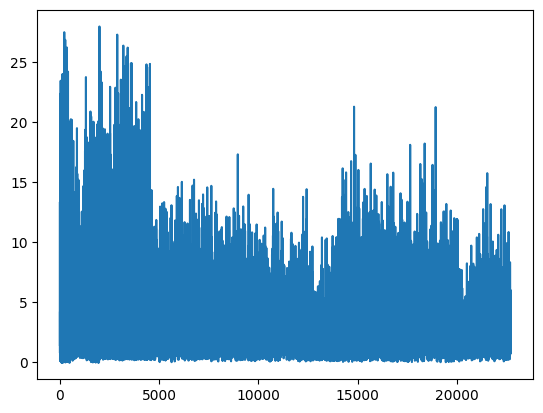

In [20]:
# ??? maximum values is well above 1. Check, if these values should be normalized.
plt.plot(match_scores.cpu().numpy())
plt.show()